In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utilities import *
from tqdm import tqdm

In [86]:
x_train, y_train, x_test, y_test = load_data()

In [87]:
print(f"Dimension of x_train : {x_train.shape}")
print(f"Dimension of y_train : {y_train.shape}")
print(np.unique(y_train, return_counts=True))

Dimension of x_train : (1000, 64, 64)
Dimension of y_train : (1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [88]:
print(f"Dimension of  x_test: {x_test.shape}")
print(f"Dimension of y_test : {y_test.shape}")
print(np.unique(y_test, return_counts=True))

Dimension of  x_test: (200, 64, 64)
Dimension of y_test : (200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\remi_\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


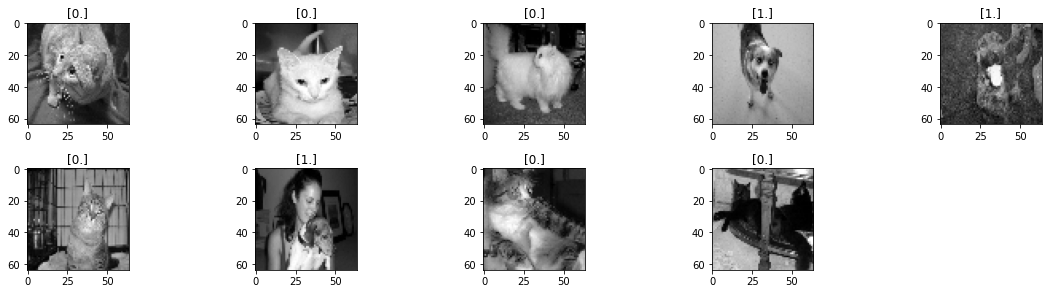

In [89]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [90]:
def normalize(A, min=0, max=255):
    return (A - min) / (max - min)

In [91]:
x_train_norm = normalize(x_train, min=x_train.min(), max=x_train.max())
x_test_norm = normalize(x_test, min=x_train.min(), max=x_train.max())

print(f"Dimension of  x_train_norm: {x_train_norm.shape}")
print(f"Dimension of  x_test_norm: {x_test_norm.shape}")

Dimension of  x_train_norm: (1000, 64, 64)
Dimension of  x_test_norm: (200, 64, 64)


In [92]:
def flat_image(A):
    m = A.shape[0]
    image_size = A.shape[1] * A.shape[2]
    B = A.flatten().reshape(m, image_size)
    return B

In [93]:
x_train_flat = flat_image(x_train_norm)
x_test_flat = flat_image(x_test_norm)

print(f"Dimension of  x_train_flat: {x_train_flat.shape}")
print(f"Dimension of  x_test_flat: {x_test_flat.shape}")

Dimension of  x_train_flat: (1000, 4096)
Dimension of  x_test_flat: (200, 4096)


In [94]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [95]:
def sigmoid(A):
    return 1/(1 + np.exp(-A))

In [96]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [97]:
def log_loss(A, y, epsilon=1e-15):
    m = len(y)
    return -(1/m)*np.sum(y*np.log(A + epsilon) + (1-y)*np.log(1 - A + epsilon))

In [98]:
def gradients(A, X, y):
    m = len(y)
    dW = (1/m)*np.dot(X.T, A-y)
    db = (1/m)*np.sum(A-y)
    return (dW, db)

In [99]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [100]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [101]:
def calcul_accuracy(X, y, W, b):
    y_pred = predict(X, W, b)
    return accuracy_score(y, y_pred)

In [102]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    history = {
        'train_loss': [],
        'test_loss': [],
        'train_accuracy': [],
        'test_accuracy': [],
    }
    W, b = initialisation(X_train)
    
    for i in tqdm(range(n_iter)):
        A_train = model(X_train, W, b)

        if i % 10 == 0:
            # train
            history['train_loss'].append(log_loss(A_train, y_train))
            history['train_accuracy'].append(calcul_accuracy(X_train, y_train, W, b))
            # test
            A_test = model(X_test, W, b)
            history['test_loss'].append(log_loss(A_test, y_test))
            history['test_accuracy'].append(calcul_accuracy(X_test, y_test, W, b))

        dW, db = gradients(A_train, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    print(f"Accuracy score (train set): {calcul_accuracy(X_train, y_train, W, b)}")
    print(f"Accuracy score (test set): {calcul_accuracy(X_test, y_test, W, b)}")
    return (W, b, history)

In [106]:
def display_loss_acc(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(history['train_loss'], label="train")
    plt.plot(history['test_loss'], label="test")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(history['train_accuracy'], label="train")
    plt.plot(history['test_accuracy'], label="test")
    plt.legend()
    plt.show()

In [109]:
(W, b, history) = artificial_neuron(x_train_flat, y_train, x_test_flat, y_test, learning_rate=0.01, n_iter=5000)

100%|██████████| 5000/5000 [00:16<00:00, 297.17it/s]

Accuracy score (train set): 0.588
Accuracy score (test set): 0.545


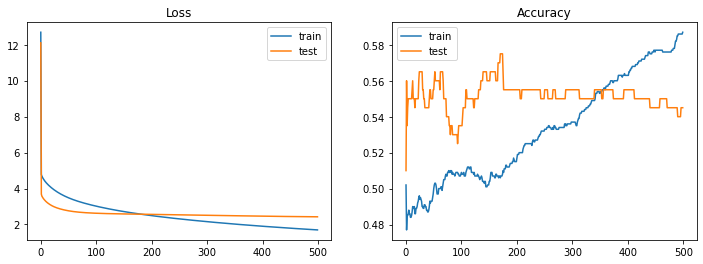

In [110]:
display_loss_acc(history)